<h1>Classification Models Part B</h1>

In [1]:
%pip install numpy matplotlib scikit-learn pydotplus ipython treeinterpreter xgboost tabulate catboost shap

Note: you may need to restart the kernel to use updated packages.


<h2>Random Forest</h2>


<h3>Load data</h3>

This dataset was obtained from the StatLib repository. https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

An household is a group of people residing within a home. Since the average number of rooms and bedrooms in this dataset are provided per household, these columns may take surpinsingly large values for block groups with few households and many empty houses, such as vacation resorts.

It can be downloaded/loaded using the sklearn.datasets.fetch_california_housing function.

Number of Instances: 20640

Number of Attributes: 8 numeric, predictive attributes and the target

Attribute Information:
        - MedInc median income in block group
        
        - HouseAge median house age in block group
        
        - AveRooms average number of rooms per household
        
        - AveBedrms average number of bedrooms per household
        
        - Population block group population
        
        - AveOccup average number of household members
        
        - Latitude block group latitude
        
        - Longitude block group longitude

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.35, random_state=42)

<h2>Train Decision Tree</h2>

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import pydotplus
from sklearn import tree
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from IPython.display import Image
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)


,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0398614 to fit



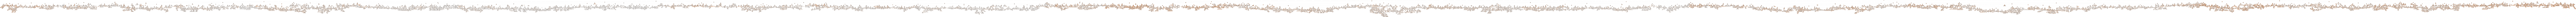

In [4]:
#To optionally view the tree, run this cell (note long running time).
dot_data = tree.export_graphviz(dt, out_file=None, 
                        feature_names=housing.feature_names,  
                        class_names=list(set(housing.target)),
                        filled=True, rounded=True,  
                        special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

<h2>Train random forest</h2>

In [5]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,n_jobs=-1)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Compare Random Forest & Decision Tree

Score of Decision Tree and Random Forest regressors is:

$$
R^2 = 1 - \frac{\sum (y_{\text{true}} - y_{\text{pred}})^2}
           {\sum (y_{\text{true}} - \bar{y}_{\text{true}})^2}
$$


In [6]:
from sklearn.metrics import mean_squared_error
y_predict=dt.predict(X_test)
y_predict=rf.predict(X_test)
print('Random Forest Score: {0:2.2f}'.format(rf.score(X_test,y_test)))
print('Decision Tree Score: {0:2.2f}'.format(dt.score(X_test,y_test)))

Random Forest Score: 0.80
Decision Tree Score: 0.58


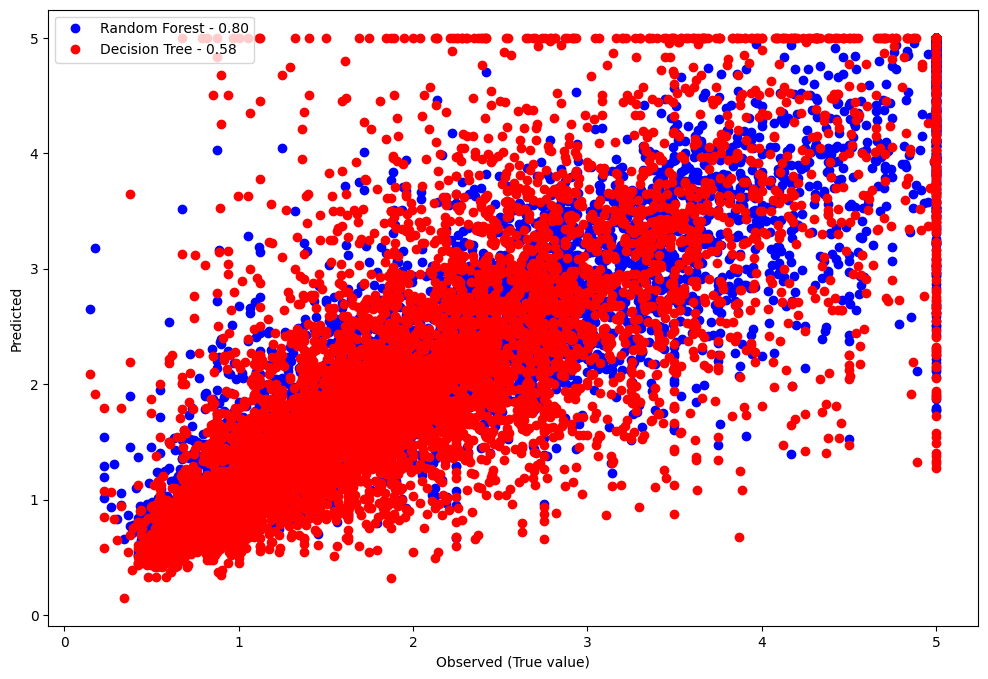

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8));
rf_plot = plt.plot(y_test, rf.predict(X_test), 'ob',label = 'Random Forest - {0:2.2f}'.format(rf.score(X_test,y_test)))
dt_plot = plt.plot(y_test, dt.predict(X_test),'or',label = 'Decision Tree - {0:2.2f}'.format(dt.score(X_test,y_test)))
plt.legend(loc = 2 )
plt.xlabel('Observed (True value)'); plt.ylabel('Predicted');

## Make predictions with Random Forest

In [8]:
instances =[300, 309]
print ("Instance 0 prediction:", rf.predict(housing.data[instances[0]].reshape(1,-1)), ' Observed:', housing.target[instances[0]])
print ("Instance 1 prediction:", rf.predict(housing.data[instances[1]].reshape(1,-1)), ' Observed:', housing.target[instances[1]])

Instance 0 prediction: [0.9237]  Observed: 0.895
Instance 1 prediction: [1.01076]  Observed: 1.0


## Overfitting

### Demonstrate overfitting with train set

In [9]:
print('Scores on Training Set:')
print('Random Forest Score: {0:2.2f}'.format(rf.score(X_train,y_train)))
print('Decision Tree Score: {0:2.2f}'.format(dt.score(X_train,y_train)))

Scores on Training Set:
Random Forest Score: 0.97
Decision Tree Score: 1.00


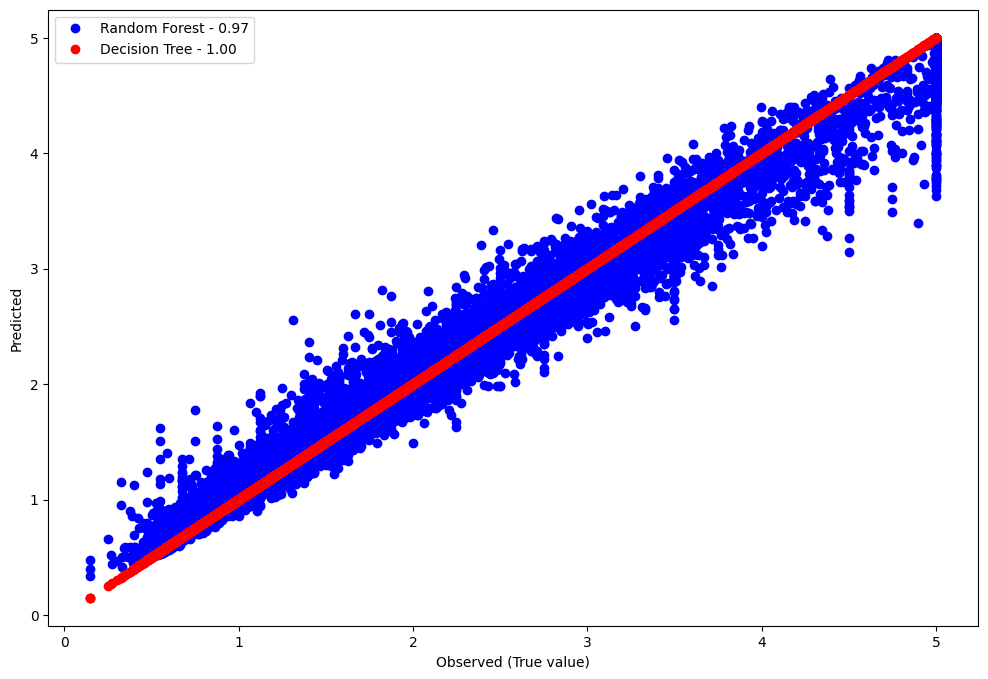

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8));
rf_plot = plt.plot(y_train, rf.predict(X_train), 'ob',label = 'Random Forest - {0:2.2f}'.format(rf.score(X_train,y_train)))
dt_plot = plt.plot(y_train, dt.predict(X_train), 'or',label = 'Decision Tree - {0:2.2f}'.format(dt.score(X_train,y_train)))
plt.legend(loc = 2 )
plt.xlabel('Observed (True value)'); plt.ylabel('Predicted');

<h2>Importance of features according to Random Forest </h2>

In [11]:
import numpy as np
sort_order = np.argsort(rf.feature_importances_)[::-1]

for i,feature_index in enumerate(sort_order): 
    feature = housing.feature_names[ feature_index ]
    imp = rf.feature_importances_[ feature_index ]
    print ('{0:d}. {1:s} Weight\t- {2:4.4f}'.format(i+1,feature, imp))

1. MedInc Weight	- 0.5247
2. AveOccup Weight	- 0.1400
3. Longitude Weight	- 0.0857
4. Latitude Weight	- 0.0840
5. HouseAge Weight	- 0.0546
6. AveRooms Weight	- 0.0486
7. Population Weight	- 0.0316
8. AveBedrms Weight	- 0.0309


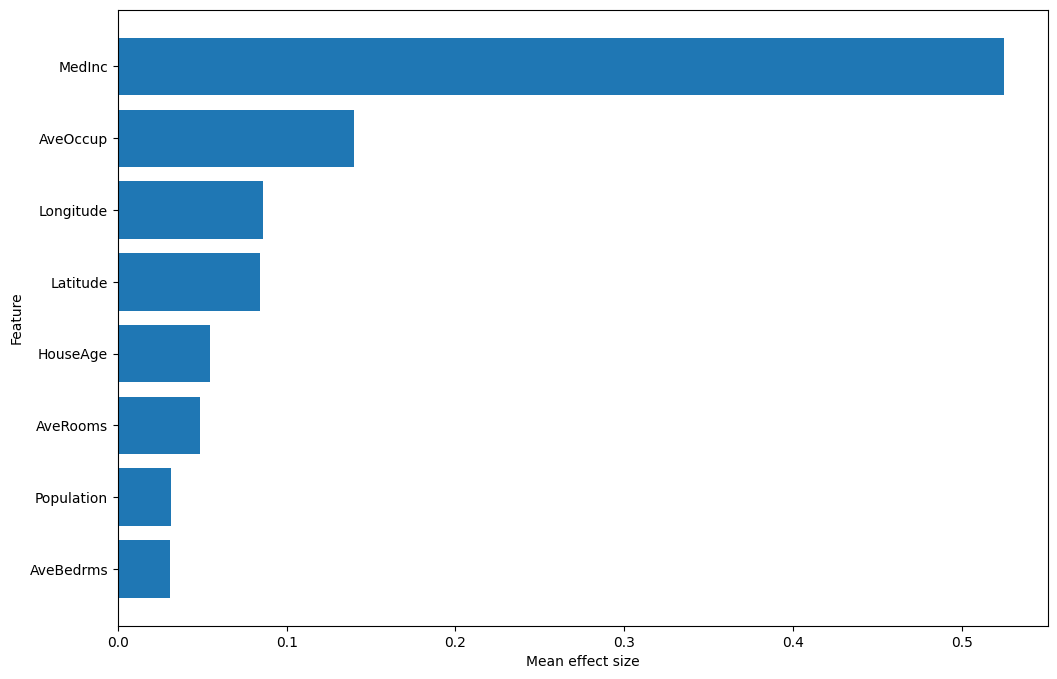

In [12]:
import numpy as np
sort_order = np.argsort(rf.feature_importances_)
x = range(len(sort_order))
y = rf.feature_importances_[sort_order]
y_ticks = np.array(housing.feature_names)[sort_order]
fig, ax = plt.subplots(figsize=(12,8))
plt.barh(x,y)
plt.xlabel('Mean effect size'); plt.ylabel('Feature');
ax.set_yticks(x)
ax.set_yticklabels(y_ticks);
plt.show()

<h2>Interpretation with treeinterpreter</h2>
>pip install treeinterpreter

TreeInterpreter:prediction is decomposed into a sum of contributions from each feature i.e. 

prediction=bias+feature_1*contribution+…+feature_n*contribution_n

In [13]:
import numpy as np
from treeinterpreter import treeinterpreter # pip install treeinterpreter 
import random
instance_index = random.sample(range(X_test.shape[0]),5) # take 5 random samples from train set

prediction, biases, contributions = treeinterpreter.predict(rf, X_test[instance_index,:])
for i in range(len(instance_index)):
    print ("Instance {0}: ({1})".format(i,instance_index[i]))
    print ("Bias (trainset mean)", biases[i])
    print ("Feature contributions:")
    sort_order = np.argsort(abs(contributions[i]))[::-1] # order results from the most to the least significant 
    for j in sort_order:
        print('\t{0} {1:2.2f}'.format(housing.feature_names[j], contributions[i,j]))
    print ("-"*20)

Instance 0: (7149)
Bias (trainset mean) 2.067243894633257
Feature contributions:
	Longitude -0.81
	Latitude 0.32
	AveOccup -0.21
	MedInc -0.10
	HouseAge -0.08
	AveRooms -0.07
	AveBedrms 0.04
	Population -0.01
--------------------
Instance 1: (1023)
Bias (trainset mean) 2.067243894633257
Feature contributions:
	AveOccup -0.24
	MedInc 0.17
	Latitude 0.12
	AveRooms -0.10
	Population 0.03
	HouseAge 0.02
	Longitude 0.01
	AveBedrms 0.00
--------------------
Instance 2: (104)
Bias (trainset mean) 2.067243894633257
Feature contributions:
	AveRooms 0.16
	MedInc -0.13
	Latitude 0.10
	Population -0.07
	AveOccup 0.06
	AveBedrms 0.02
	HouseAge 0.01
	Longitude -0.00
--------------------
Instance 3: (4102)
Bias (trainset mean) 2.067243894633257
Feature contributions:
	MedInc -0.89
	Latitude -0.32
	AveRooms -0.17
	Longitude 0.07
	AveOccup -0.06
	HouseAge 0.06
	AveBedrms -0.01
	Population -0.00
--------------------
Instance 4: (6072)
Bias (trainset mean) 2.067243894633257
Feature contributions:
	MedInc

<h1>AdaBoostClassifier </h1>

In [14]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

<h3>Reload housing data</h3>

In [15]:
housing = fetch_california_housing()

<h3> Create a binary target variable - price above mean </h3>

In [16]:
housing.target = housing.target > housing.target.mean()

<h3>Split the data to train and test</h3>

In [17]:
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.35, random_state=42)

<h3>Train AdaBoostClassifier</h3>

In [18]:
model = abc.fit(X_train, y_train)

<h3>Evaluate AdaBoostClassifier</h3>

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

       False       0.85      0.90      0.87      4282
        True       0.84      0.77      0.80      2942

    accuracy                           0.85      7224
   macro avg       0.85      0.84      0.84      7224
weighted avg       0.85      0.85      0.85      7224



<h1>Random Forest Regressor & xgboost Regressor</h1>

<h3>Reload housing data</h3>

In [20]:
housing = fetch_california_housing()

<h3>Split the data to train and test</h3>

In [21]:
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.35, random_state=42)

<h3>Train Random Forest Regressor</h3>

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,n_jobs=-1)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


<h2>Train xgboost</h2>

In [23]:
#!pip install xgboost
import xgboost as xgb
xg_reg = xgb.XGBRegressor(verbosity=0) 
xg_reg.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,0.5
,booster,'gbtree'
,callbacks,None
,colsample_bylevel,1
,colsample_bynode,1
,colsample_bytree,1
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None
,gamma,0


<h2>Compare Random Forest & xgboost</h2>
Score of Decision Tree and Random Forest regressors is $$R^2=1-\dfrac{\sum (y_{true}-y_{pred})^2}{\sum (y_{true}-<y_{true}>)^2}$$

In [24]:
from sklearn.metrics import r2_score
preds = xg_reg.predict(X_test)
print('Random Forest Score: {0:2.2f}'.format(rf.score(X_test,y_test)))
print('xgboost Score: {0:2.2f}'.format(r2_score(preds,y_test)))

Random Forest Score: 0.81
xgboost Score: 0.81


<h3> Random Forest Feature Importances</h3>

In [25]:
import numpy as np
sort_order = np.argsort(xg_reg.feature_importances_)[::-1]

for i,feature_index in enumerate(sort_order): 
    feature = housing.feature_names[ feature_index ]
    imp = rf.feature_importances_[ feature_index ]
    print ('{0:d}. {1:s} Weight\t- {2:4.4f}'.format(i+1,feature, imp))

1. MedInc Weight	- 0.5274
2. AveOccup Weight	- 0.1387
3. Longitude Weight	- 0.0861
4. Latitude Weight	- 0.0853
5. HouseAge Weight	- 0.0543
6. AveRooms Weight	- 0.0473
7. AveBedrms Weight	- 0.0298
8. Population Weight	- 0.0310


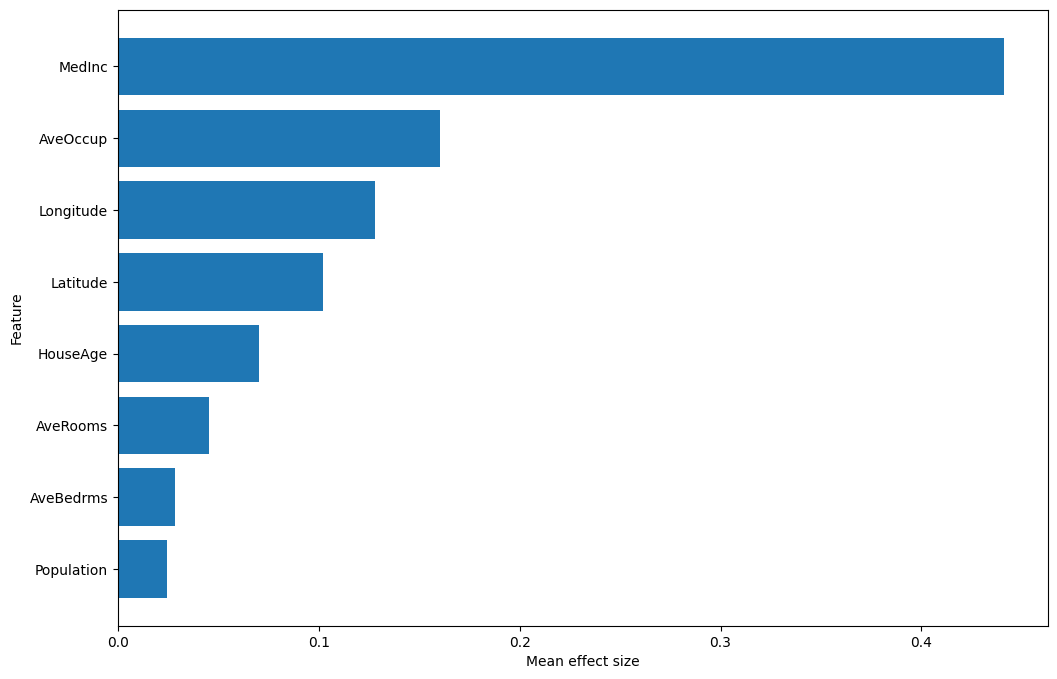

In [26]:
import matplotlib.pyplot as plt
import numpy as np
sort_order = np.argsort(xg_reg.feature_importances_)
x = range(len(sort_order))
y = xg_reg.feature_importances_[sort_order]
y_ticks = np.array(housing.feature_names)[sort_order]
fig, ax = plt.subplots(figsize=(12,8))
plt.barh(x,y)
plt.xlabel('Mean effect size')
plt.ylabel('Feature')
ax.set_yticks(x)
ax.set_yticklabels(y_ticks)
plt.show()

<h3> xgboost Feature Importances</h3>

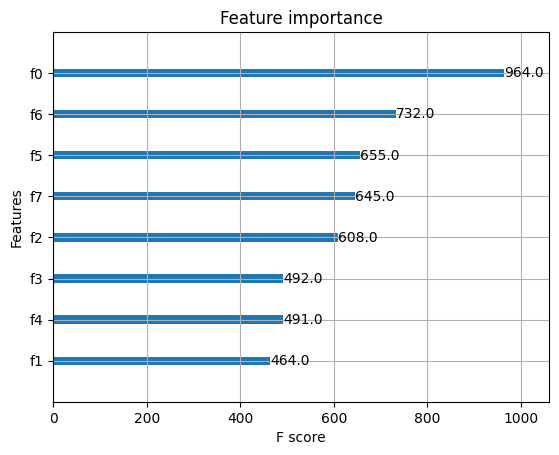

In [27]:
from xgboost import plot_importance
plot_importance(xg_reg)
plt.show()

## CatBoost (Yandex)

CatBoost is a gradient boosting library that is particularly strong when working with **categorical features**.  
Unlike XGBoost and LightGBM, CatBoost can handle categorical variables **natively**, without the need for one-hot encoding.  

**Key ideas:**
- **Ordered Boosting** – reduces target leakage by using permutations during training.
- **Oblivious (symmetric) Trees** – same split at each level, making models faster and more regularized.
- **Strong defaults** – usually requires less parameter tuning than XGBoost or LightGBM.
- **Native support** for missing values and categorical/text features.

**When to use CatBoost:**
- Data with many categorical columns (IDs, product codes, user/device types).
- Mixed datasets (numeric + categorical).
- When you want strong performance with minimal hyperparameter tuning.

---


In [28]:
from catboost import CatBoostClassifier, Pool
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report
import pandas as pd

# Data
X_np, y = load_breast_cancer(return_X_y=True, as_frame=True)
X = pd.DataFrame(X_np)
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Pools (no categorical features here)
train_pool = Pool(X_train, y_train)
valid_pool = Pool(X_valid, y_valid)

# Model
cbc = CatBoostClassifier(
    loss_function="Logloss",
    eval_metric="AUC",
    iterations=2000,
    learning_rate=0.03,
    depth=6,
    random_seed=42,
    verbose=200,
    use_best_model=True
)

cbc.fit(train_pool, eval_set=valid_pool, early_stopping_rounds=100)

# Eval
proba = cbc.predict_proba(valid_pool)[:, 1]
pred = (proba >= 0.5).astype(int)
print("AUC:", roc_auc_score(y_valid, proba))
print(classification_report(y_valid, pred))


0:	test: 0.9742063	best: 0.9742063 (0)	total: 148ms	remaining: 4m 54s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9973544974
bestIteration = 5

Shrink model to first 6 iterations.
AUC: 0.9973544973544973
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



<h3>Stacking Ensemble – Example</h3>

In [29]:
# --- imports ---
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Split (stratified) for fair holdout evaluation
housing.target = housing.target > housing.target.mean()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.35, random_state=42)

# Pipelines (scaling helps KNN & LogisticRegression)
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
meta = make_pipeline(StandardScaler(), LogisticRegression(max_iter=500, n_jobs=None, random_state=42))

base_learners = [
    ('dt', dt),
    ('knn', knn)
]

stack = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta,
    cv=5,                       # out-of-fold predictions for meta-learner
    n_jobs=-1
)

# -----------------------
# Cross-validated comparison (train folds only)
# -----------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def cv_scores(model, X, y, name, scoring="accuracy"):
    scores = cross_val_score(model, X, y, scoring=scoring, cv=cv, n_jobs=-1)
    print(f"{name:10s} | {scoring:10s} | mean={scores.mean():.3f} ± {scores.std():.3f}")

for scoring in ["accuracy", "f1_macro"]:
    cv_scores(dt,   X_train, y_train, "DecisionTree", scoring)
    cv_scores(knn,  X_train, y_train, "KNN",          scoring)
    cv_scores(stack,X_train, y_train, "Stacking",     scoring)

# -----------------------
# Fit on train, evaluate on holdout test
# -----------------------
for name, model in [("DecisionTree", dt), ("KNN", knn), ("Stacking", stack)]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1m = f1_score(y_test, y_pred, average="macro")

    # ROC-AUC (works for binary & multiclass with OvR if predict_proba exists)
    try:
        y_proba = model.predict_proba(X_test)
        # If y is not 0..K-1, make sure labels are encoded; here we assume proper encoding.
        if y_proba.shape[1] == 2:
            # binary: use positive class prob
            auc = roc_auc_score(y_test, y_proba[:, 1])
        else:
            # multiclass OvR macro
            auc = roc_auc_score(y_test, y_proba, multi_class="ovr", average="macro")
    except Exception:
        auc = np.nan

    print(f"\n=== {name} (Test) ===")
    print(f"Accuracy : {acc:.3f}")
    print(f"F1-macro: {f1m:.3f}")
    print(f"ROC-AUC : {auc if not np.isnan(auc) else 'N/A'}")

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))


DecisionTree | accuracy   | mean=0.793 ± 0.005
KNN        | accuracy   | mean=0.830 ± 0.008
Stacking   | accuracy   | mean=0.838 ± 0.006
DecisionTree | f1_macro   | mean=0.780 ± 0.005
KNN        | f1_macro   | mean=0.822 ± 0.008
Stacking   | f1_macro   | mean=0.830 ± 0.007

=== DecisionTree (Test) ===
Accuracy : 0.794
F1-macro: 0.783
ROC-AUC : 0.8466704964833107
Confusion Matrix:
[[3672  610]
 [ 881 2061]]

Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.86      0.83      4282
        True       0.77      0.70      0.73      2942

    accuracy                           0.79      7224
   macro avg       0.79      0.78      0.78      7224
weighted avg       0.79      0.79      0.79      7224


=== KNN (Test) ===
Accuracy : 0.828
F1-macro: 0.821
ROC-AUC : 0.8933288240245556
Confusion Matrix:
[[3749  533]
 [ 706 2236]]

Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.88

<h1>Similarity-based mode</h1>

<h3>Generate Sample Data</h3>

In [30]:
import numpy as np
X = np.asarray([1, 2, 3, 4]).reshape(1, -1)
Y = np.asarray([4, 3, 2, 1]).reshape(1, -1)
Z = np.asarray([1, 2, 2, 1]).reshape(1, -1)

Calculate the euclidean distance between X and Y

In [31]:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_distances(Y,X)

array([[4.47213595]])

In [32]:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_distances(Z,X)

array([[3.16227766]])

Create a function that get library name, metric name, mertic function, and two vectors and return a list with the libray name, the metric name and the distance between the vectors using each method

In [33]:
def test_metric(library_name, metric_name, metric_function,X,Y):
    return [library_name,metric_name,X,Y, metric_function(X,Y)]

Present the resutls in a table

#!pip install tabulate

In [34]:
from IPython.display import HTML, display
import tabulate
table = [ ['LIBRARY','METHOD','X','Y','VALUE']]

from sklearn.metrics.pairwise import euclidean_distances
table.append(test_metric('sklearn.metrics.pairwise.euclidean_distances','euclidean_distances',euclidean_distances,X,Y))
table.append(test_metric('sklearn.metrics.pairwise.euclidean_distances','euclidean_distances',euclidean_distances,X,Z))

from sklearn.metrics.pairwise import manhattan_distances
table.append(test_metric('sklearn.metrics.pairwise.manhattan_distances','manhattan_distances',manhattan_distances,X,Y))
table.append(test_metric('sklearn.metrics.pairwise.manhattan_distances','manhattan_distances',manhattan_distances,X,Z))

from sklearn.metrics.pairwise import cosine_similarity
table.append(test_metric('sklearn.metrics.pairwise.cosine_similarity','cosine_similarity',cosine_similarity,X,Y))
table.append(test_metric('sklearn.metrics.pairwise.cosine_similarity','cosine_similarity',cosine_similarity,X,Z))

from sklearn.metrics.pairwise import cosine_distances
table.append(test_metric('sklearn.metrics.pairwise.cosine_distances','cosine_distances',cosine_distances,X,Y))
table.append(test_metric('sklearn.metrics.pairwise.cosine_distances','cosine_distances',cosine_distances,X,Z))

display(HTML(tabulate.tabulate(table, tablefmt='html')))

LIBRARY,METHOD,X,Y,VALUE
sklearn.metrics.pairwise.euclidean_distances,euclidean_distances,[[1 2 3 4]],[[4 3 2 1]],[[4.47213595]]
sklearn.metrics.pairwise.euclidean_distances,euclidean_distances,[[1 2 3 4]],[[1 2 2 1]],[[3.16227766]]
sklearn.metrics.pairwise.manhattan_distances,manhattan_distances,[[1 2 3 4]],[[4 3 2 1]],[[8.]]
sklearn.metrics.pairwise.manhattan_distances,manhattan_distances,[[1 2 3 4]],[[1 2 2 1]],[[4.]]
sklearn.metrics.pairwise.cosine_similarity,cosine_similarity,[[1 2 3 4]],[[4 3 2 1]],[[0.66666667]]
sklearn.metrics.pairwise.cosine_similarity,cosine_similarity,[[1 2 3 4]],[[1 2 2 1]],[[0.8660254]]
sklearn.metrics.pairwise.cosine_distances,cosine_distances,[[1 2 3 4]],[[4 3 2 1]],[[0.33333333]]
sklearn.metrics.pairwise.cosine_distances,cosine_distances,[[1 2 3 4]],[[1 2 2 1]],[[0.1339746]]


<h3>Syntehtic example of the K-Nearest Neighbors algorithm</h3>

Source: http://scikit-learn.org/stable/modules/neighbors.html 

In [35]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
print(X)
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(X)

[[-1 -1]
 [-2 -1]
 [-3 -2]
 [ 1  1]
 [ 2  1]
 [ 3  2]]


#### Retrieve node neighbours  and distances

kneighbors() returns two arrays:

indices → the row indices of the nearest neighbors

distances → the Euclidean distances to those neighbors

In [36]:
distances, indices = nbrs.kneighbors(X)
print('list of neighbors for every node:')
print(indices) 

list of neighbors for every node:
[[0 1 2]
 [1 0 2]
 [2 1 0]
 [3 4 5]
 [4 3 5]
 [5 4 3]]


Explanation:

Each row i lists the closest neighbors of sample i.

The first element is always the point itself, because its nearest neighbor has distance 0.

Samples {0, 1, 2} are neighbors of each other, and {3, 4, 5} form another group → indicates two clusters.

Example:
For sample 0, the neighbors are [0, 1, 2] → itself, then sample 1, then sample 2.

In [37]:
print('Distances:')
print(distances)

Distances:
[[0.         1.         2.23606798]
 [0.         1.         1.41421356]
 [0.         1.41421356 2.23606798]
 [0.         1.         2.23606798]
 [0.         1.         1.41421356]
 [0.         1.41421356 2.23606798]]


Explanation:

Each row lists the distances to the neighbors in the same order as indices.

The first distance is always 0 (distance to itself).

Distances reflect the geometric structure of your dataset.

Example:
For sample 0, the distances [0, 1, 2.236...] correspond to neighbors [0, 1, 2].

<h3>Connections graph</h3>

In [38]:
print('Connections graph:')
print(nbrs.kneighbors_graph(X).toarray())

Connections graph:
[[1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]]


This matrix shows which points are connected to which neighbors.

Rows correspond to each sample.
Columns correspond to potential neighbors.

A 1 means the sample is connected to that neighbor.
A 0 means no connection.

### 🔎 Handling Categorical Features in KNN: Hamming vs Gower Distance

KNN relies on distance metrics, which are naturally numeric.  
To include categorical features, we need special treatments:

- **Hamming Distance** → counts mismatches between categorical features.  
  - Red vs Red = 0 (same)  
  - Red vs Blue = 1 (different)  

- **Gower Distance** → handles *mixed data* (numeric + categorical).  
  - Numeric features are normalized between 0–1.  
  - Categorical features use Hamming logic (0 if same, 1 if different).  
  - Final distance = average across all features.  

---

#### 📊 Example Data
| Person | Age | Color | Married |
|--------|-----|-------|---------|
| A      | 30  | Red   | Yes     |
| B      | 40  | Blue  | Yes     |

---

#### 🧮 Step-by-Step Distance Calculation

**Hamming (categorical only)**  
- Compare `Color`: Red ≠ Blue → 1  
- Compare `Married`: Yes = Yes → 0  
- Hamming distance = (1 mismatch out of 2) = **0.5**

**Gower (mixed features)**  
- Age difference = |30 – 40| / (range 50 assumed) = 10/50 = 0.2  
- Color difference = Red ≠ Blue → 1  
- Married difference = Yes = Yes → 0  
- Gower distance = (0.2 + 1 + 0) / 3 = **0.4**


In [ ]:
distances, indices = nbrs.kneighbors(X)
print('list of neighbors for every node:')
print(indices) 

list of neighbors for every node:
[[0 1 2]
 [1 0 2]
 [2 1 0]
 [3 4 5]
 [4 3 5]
 [5 4 3]]


In [39]:
%pip install gower

Note: you may need to restart the kernel to use updated packages.


In [40]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
import gower   # pip install gower

# Example dataset
data = pd.DataFrame({
    "Age": [20, 40, 80],    
    "Color": ["Red", "Blue", "Blue"],
    "Married": ["Yes", "Yes", "No"]
})

print("Data:")
print(data)

# ---------- Hamming Distance ----------
# One-hot encode categoricals
# Columns: Color_Blue, Color_Red, Married_No, Married_Yes
# Row0 = [0,1,0,1]  (20, Red, Yes)
# Row1 = [1,0,0,1]  (40, Blue, Yes)
# Row2 = [1,0,1,0]  (80, Blue, No)
X_cat = pd.get_dummies(data[["Color", "Married"]])
hamming = pairwise_distances(X_cat, metric="hamming")

# Hamming = (# of positions different) / (# of total positions)
# Pair (Row0, Row1): differ in 2/4 = 0.5
# Pair (Row0, Row2): differ in 4/4 = 1.0
# Pair (Row1, Row2): differ in 2/4 = 0.5

print("\nHamming Distance Matrix:")
print(hamming)

# ---------- Gower Distance ----------
# Gower = average of normalized differences across all features

# Step 1: Age normalization
# Range = max(Age) - min(Age) = 80 - 20 = 60
# - (Row0, Row1): |20-40|/60 = 20/60 = 0.333
# - (Row0, Row2): |20-80|/60 = 60/60 = 1.0
# - (Row1, Row2): |40-80|/60 = 40/60 = 0.667

# Step 2: Color (categorical: 0 if same, 1 if different)
# - (Row0, Row1): Red vs Blue = 1
# - (Row0, Row2): Red vs Blue = 1
# - (Row1, Row2): Blue vs Blue = 0

# Step 3: Married (categorical: 0 if same, 1 if different)
# - (Row0, Row1): Yes vs Yes = 0
# - (Row0, Row2): Yes vs No  = 1
# - (Row1, Row2): Yes vs No  = 1

# Step 4: Average across features
# - (Row0, Row1): (0.333 + 1 + 0) / 3 = 1.333 / 3 = 0.444
# - (Row0, Row2): (1.0 + 1 + 1) / 3 = 3 / 3 = 1.0
# - (Row1, Row2): (0.667 + 0 + 1) / 3 = 1.667 / 3 ≈ 0.556

gower_dist = gower.gower_matrix(data)

print("\nGower Distance Matrix:")
print(gower_dist)


Data:
   Age Color Married
0   20   Red     Yes
1   40  Blue     Yes
2   80  Blue      No

Hamming Distance Matrix:
[[0.  0.5 1. ]
 [0.5 0.  0.5]
 [1.  0.5 0. ]]

Gower Distance Matrix:
[[0.         0.44444445 1.        ]
 [0.44444445 0.         0.5555556 ]
 [1.         0.5555556  0.        ]]


# KNN – iris
## Using KNN Classifier to distinguish between flowers

#### Load data

In [41]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
X = pd.DataFrame(iris.data , columns=iris.feature_names)
y = iris.target

iris.data[:5]

In [42]:
iris.target[:5]

array([0, 0, 0, 0, 0])

### Demonstrate the use of the NearestNeighbors structure

In [43]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
print('indices:')
print(indices[:5])
print('distances:')
print(distances[:5])
print('neighbors graph:')
print(nbrs.kneighbors_graph(X).toarray()[:5])

indices:
[[ 0 17]
 [ 1 34]
 [ 2 47]
 [ 3 47]
 [ 4 37]]
distances:
[[0.         0.1       ]
 [0.         0.14142136]
 [0.         0.14142136]
 [0.         0.14142136]
 [0.         0.14142136]]
neighbors graph:
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0

#### Show model parameters

In [44]:
nbrs.get_params()

{'algorithm': 'ball_tree',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'radius': 1.0}

<h4>Train the classifier</h4>

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
classification = KNeighborsClassifier(n_neighbors=10, weights='uniform')
classification.fit(X = X_train, y =y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


#### Classification precision

In [46]:
predictions = classification.predict(X_test)
print('Validating test set:')
for idx, class_name in enumerate(iris['target_names']):
    print('\t{0:s}: {1:d} of {2:d} classified correctly'.format(class_name,sum( (predictions==y_test) & (y_test==idx)),sum(y_test==idx)))
print('Prediction Score (classification mean accuracy): {0:2.2f}'.format(classification.score(X_test,y_test)))

Validating test set:
	setosa: 19 of 19 classified correctly
	versicolor: 15 of 15 classified correctly
	virginica: 15 of 16 classified correctly
Prediction Score (classification mean accuracy): 0.98


In [47]:
classification.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [48]:
classification.predict_proba(X_test[:5])

array([[0. , 0.9, 0.1],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.8, 0.2],
       [0. , 0.8, 0.2]])

<h3>Visualization in 2d</h3>
<h4>Transformation of the dataset into 2d space using PCA</h4>

In [49]:
from sklearn.decomposition import PCA
pca_estimator = PCA(n_components=2)
pca_estimator.fit(X_train)
X_test2d = pca_estimator.transform(X_test)
X_train2d= pca_estimator.transform(X_train)

<h4>Classify data in 2D</h4>

In [50]:
from sklearn.neighbors import KNeighborsClassifier 
classification2d = KNeighborsClassifier(n_neighbors=10, weights='uniform')
classification2d.fit(X = X_train2d, y =y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


<h4>Display 2d classification</h4>

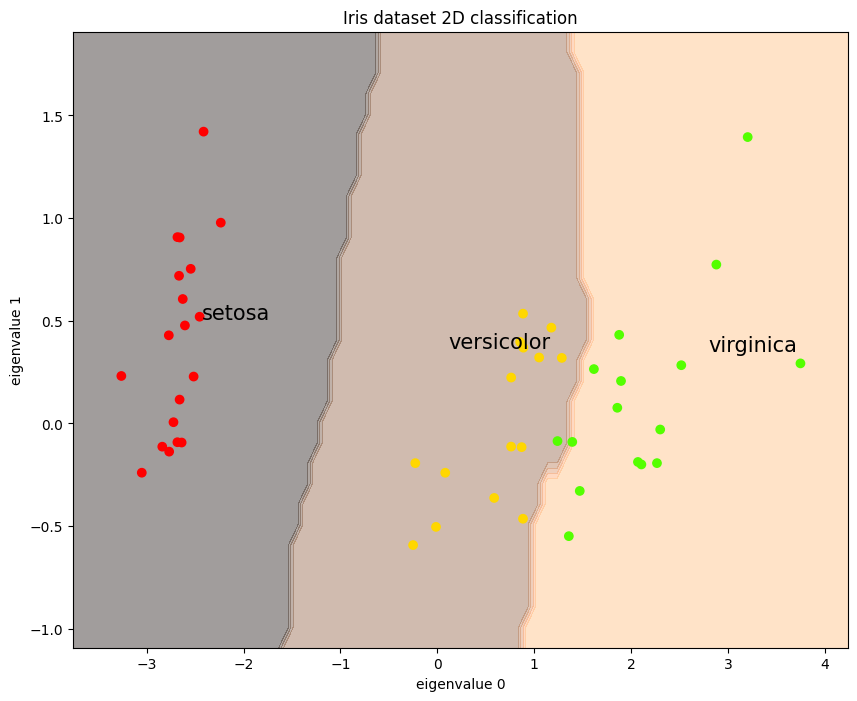

In [51]:
%matplotlib inline 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x_min, x_max = X_test2d[:, 0].min() - .5, X_test2d[:, 0].max() + .5
y_min, y_max = X_test2d[:, 1].min() - .5, X_test2d[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
ZZ = classification2d.predict(np.vstack((xx.ravel(), yy.ravel())).T)
ZZ = ZZ.reshape(xx.shape)

plt.figure(figsize=(10,8))
plt.contourf(xx, yy, ZZ, cmap=plt.cm.copper, alpha=0.4)
plt.scatter(x=X_test2d[:,0],y=X_test2d[:,1],c=y_test,cmap=plt.cm.prism)
plt.title('Iris dataset 2D classification');plt.xlabel('eigenvalue 0'); plt.ylabel('eigenvalue 1');
# annotate area
for class_id in classification2d.classes_:
    class_name = iris.target_names[class_id]
    class_mean_x = np.mean(xx[ZZ==class_id])
    class_mean_y = np.mean(yy[ZZ==class_id])
    plt.annotate(class_name,xy=(class_mean_x,class_mean_y),fontsize=15)
plt.show()

In [52]:
def display_classification_results(classifier, x_train, y_train, x_val, y_val):    
    print('Classifier: {0:s}\nParameters:'.format(classifier.__class__.__name__))
    for k,v in classifier.get_params().items():
        print('\t{0} : {1}'.format(k,v))
    training_set_score = classifier.score(x_train,y_train)
    print('Testing on TRAINING set: {}'.format(training_set_score))
    val_set_score = classifier.score(x_val,y_val)
    print('Validation on TEST set: {}'.format(val_set_score))
    return (training_set_score,val_set_score)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train,y_train)

display_classification_results(knn_classifier, X_train, y_train, X_test, y_test);

Classifier: KNeighborsClassifier
Parameters:
	algorithm : auto
	leaf_size : 30
	metric : minkowski
	metric_params : None
	n_jobs : None
	n_neighbors : 5
	p : 2
	weights : uniform
Testing on TRAINING set: 0.9523809523809523
Validation on TEST set: 1.0


# Predict invidual income using different classification techniques
## Objective
<p>This example uses individual level income data to demonstrate how different classification methods can be used to predict one's income.</p>
<span style="color: blue; font-size: 150%;">Determine whether a person makes over 50K a year</span> <br>
## Classification Methods
<ul>
    <li>Decision Tree Classifier</li>
    <li>Random Forest Classifier</li>
    <li>Knn Classifier</li>
    <li>Logistic Regression Classifier</li>
    <li>Adaboost classifier</li>
</ul>

## Methodology
<ol type="1" start="0">
    <li>Download and preprocess data</li>
    <li>Load data into the notebook</li>
    <li>Split the data into <span style="color: red;">train</span>, <span style="color: blue;">validation</span> and  <span style="color: green;">test</span> sets</li>
    <li>Test classifiers:<br> 
        For each classifier
    <ul>
        <li>Train the classifier (use <span style="color: red;">train</span> dataset)</li>
        <li>Validate the classifier (use <span style="color: blue;">validation </span> dataset)</li>
    </ul>
    </li>
    <li>Compare classifers using the (yet unseen!) <span style="color: green;">test</span> set</li>
</ol>

## Download and preprocess data
## Data Source: 
Location: https://archive.ics.uci.edu/ml/datasets/Adult


### Attributes: 

<table>
    <tr><th>attribute name</th><th>Description</th></tr>
    <tr><td>income</td><td>>50K, <=50K.</td></tr> 
    <tr><td>age</td><td>continuous</td></tr> 
    <tr><td>workclass</td><td>Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked</td></tr>
    <tr><td>fnlwgt</td><td>continuous</td></tr>
    <tr><td>education</td><td>Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool</td></tr>
    <tr><td>education-num</td><td>continuous</td></tr>
    <tr><td>marital-status</td><td>Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse</td></tr>
    <tr><td>occupation</td><td>Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces</td></tr>
    <tr><td>relationship</td><td>Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried</td></tr>
    <tr><td>race</td><td>White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black</td></tr>
    <tr><td>sex</td><td>Female, Maletd></tr>
    <tr><td>capital-gain</td><td>continuous</td></tr>
    <tr><td>capital-loss</td><td>continuous</td></tr>
    <tr><td>hours-per-week</td><td>continuous</td></tr>
    <tr><td>native-country</td><td>United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands</td></tr>
</table>

Further data details at: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv('local_data/income_data.csv')
X = data[ data.columns[:-2] ]
y = data['Income:>50K:1']==1
attribute_names = np.array(data.columns[:-2])
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [55]:
def display_classification_results(classifier, x_train, y_train, x_val, y_val):    
    print('Classifier: {0:s}\nParameters:'.format(classifier.__class__.__name__))
    for k,v in classifier.get_params().items():
        print('\t{0} : {1}'.format(k,v))
    training_set_score = classifier.score(x_train,y_train)
    print('Testing on TRAINING set: {}'.format(training_set_score))
    val_set_score = classifier.score(x_val,y_val)
    print('Validation on VALIDATION set: {}'.format(val_set_score))
    return (training_set_score,val_set_score)

### Test different models
#### Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
decision_tree =  DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)

display_classification_results(decision_tree, x_train, y_train, x_test, y_test)

print('Random Classifier: {0}'.format(1-np.sum(y_train)/y_train.shape[0]))
print('Tree Structure:\n\tdepth: {0}\n\tnodes: {1}'.format(decision_tree.tree_.max_depth, decision_tree.tree_.node_count))

Classifier: DecisionTreeClassifier
Parameters:
	ccp_alpha : 0.0
	class_weight : None
	criterion : gini
	max_depth : None
	max_features : None
	max_leaf_nodes : None
	min_impurity_decrease : 0.0
	min_samples_leaf : 1
	min_samples_split : 2
	min_weight_fraction_leaf : 0.0
	monotonic_cst : None
	random_state : None
	splitter : best
Testing on TRAINING set: 1.0
Validation on VALIDATION set: 0.8108078240689579
Random Classifier: 0.7528536920380808
Tree Structure:
	depth: 46
	nodes: 6265


#### Explore Decision Tree Overfitting
Check Training and test set accuracy as a function of tree depth 

In [57]:
# prepare variables
depths = np.array(range(1,45))
train_set_accuracy = np.zeros ( depths.shape )
val_set_accuracy = np.zeros ( depths.shape )
number_of_leaves = np.zeros ( depths.shape )

from sklearn.tree import DecisionTreeClassifier
#compute decision tree for every depth and test its accuracy
for i, current_depth in enumerate(depths):
    decision_tree =  DecisionTreeClassifier(max_depth=current_depth)
    decision_tree.fit(x_train,y_train)
    train_set_accuracy[i]  = decision_tree.score(x_train,y_train)
    val_set_accuracy[i]  = decision_tree.score(x_test,y_test)
    number_of_leaves[i] = decision_tree.tree_.node_count

Display results:

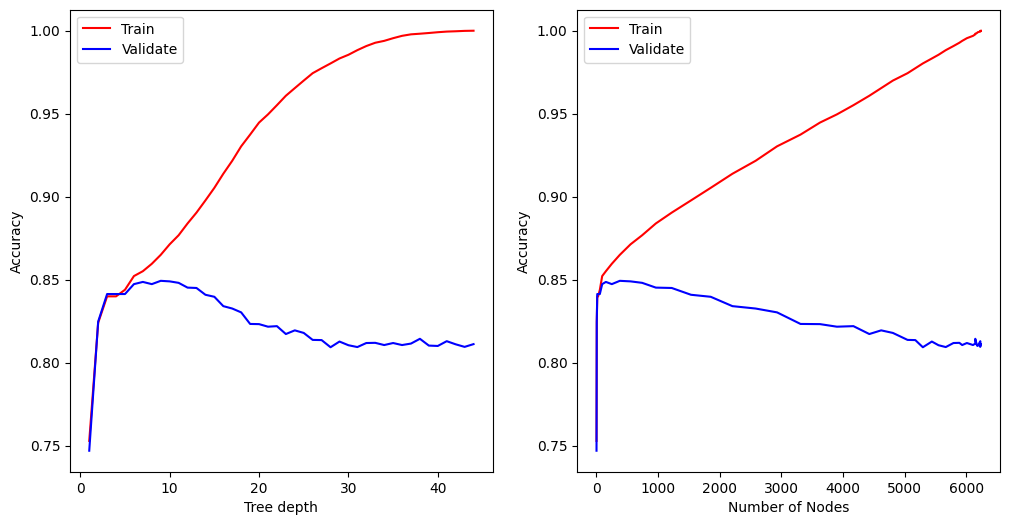

In [58]:
import matplotlib.pyplot as plt
plt.figure( figsize=(12,6))

plt.subplot(121)
plt.plot(depths,train_set_accuracy,'r',label = 'Train')
plt.plot(depths,val_set_accuracy,'b',label = 'Validate')
plt.xlabel('Tree depth'); plt.ylabel('Accuracy');
plt.legend()

plt.subplot(122)
plt.plot(number_of_leaves,train_set_accuracy,'r',label = 'Train')
plt.plot(number_of_leaves,val_set_accuracy,'b',label = 'Validate')
plt.xlabel('Number of Nodes'); plt.ylabel('Accuracy');
plt.legend()

plt.show()

#### Train Best Decision Tree Classifier 

In [59]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_best =  DecisionTreeClassifier(max_depth=9)
decision_tree_best.fit(x_train,y_train)
display_classification_results(decision_tree_best, x_train, y_train, x_test, y_test);

Classifier: DecisionTreeClassifier
Parameters:
	ccp_alpha : 0.0
	class_weight : None
	criterion : gini
	max_depth : 9
	max_features : None
	max_leaf_nodes : None
	min_impurity_decrease : 0.0
	min_samples_leaf : 1
	min_samples_split : 2
	min_weight_fraction_leaf : 0.0
	monotonic_cst : None
	random_state : None
	splitter : best
Testing on TRAINING set: 0.8649173495003079
Validation on VALIDATION set: 0.8500386783069952


### Random Forest 

In [60]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=1000, criterion='gini', n_jobs=-1,max_depth=10,min_samples_leaf=5)
random_forest.fit(x_train,y_train)

display_classification_results(random_forest, x_train, y_train, x_test, y_test);

Classifier: RandomForestClassifier
Parameters:
	bootstrap : True
	ccp_alpha : 0.0
	class_weight : None
	criterion : gini
	max_depth : 10
	max_features : sqrt
	max_leaf_nodes : None
	max_samples : None
	min_impurity_decrease : 0.0
	min_samples_leaf : 5
	min_samples_split : 2
	min_weight_fraction_leaf : 0.0
	monotonic_cst : None
	n_estimators : 1000
	n_jobs : -1
	oob_score : False
	random_state : None
	verbose : 0
	warm_start : False
Testing on TRAINING set: 0.856249703973855
Validation on VALIDATION set: 0.8551221129406564


#### List Random Forest Features by their importance 

In [61]:
feature_rank = np.argsort(random_forest.feature_importances_)[::-1]
for i, index in enumerate(feature_rank[:10]):
    print('{0:d}. {1:s} ({2:2.2f})'.format(i+1, attribute_names[index],random_forest.feature_importances_[index]))

1. marital-status:Married-civ-spouse:2 (0.15)
2. capital-gain (0.15)
3. education-num (0.11)
4. relationship:Husband:0 (0.10)
5. age (0.06)
6. marital-status:Never-married:4 (0.05)
7. hours-per-week (0.04)
8. capital-loss (0.03)
9. occupation:Exec-managerial:3 (0.03)
10. occupation:Prof-specialty:9 (0.02)


#### k-Nearest Neighbors 

In [62]:

from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=12, n_jobs=-1)
knn_classifier.fit(x_train,y_train)
display_classification_results(knn_classifier, x_train, y_train, x_test, y_test);

Classifier: KNeighborsClassifier
Parameters:
	algorithm : auto
	leaf_size : 30
	metric : minkowski
	metric_params : None
	n_jobs : -1
	n_neighbors : 12
	p : 2
	weights : uniform
Testing on TRAINING set: 0.8028702695022024
Validation on VALIDATION set: 0.7829594430323793


### Adoboost classifier (Boosted trees)

In [63]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost_classifier = AdaBoostClassifier(n_estimators=50)
result = ada_boost_classifier.fit(x_train,y_train)
display_classification_results(ada_boost_classifier, x_train, y_train, x_test, y_test);

Classifier: AdaBoostClassifier
Parameters:
	algorithm : deprecated
	estimator : None
	learning_rate : 1.0
	n_estimators : 50
	random_state : None
Testing on TRAINING set: 0.8497134466916118
Validation on VALIDATION set: 0.8492651121670903


In [64]:
print('Decision Tree: {0:3.3f}'.format(decision_tree_best.score(x_test,y_test)))
print('Random Forest: {0:3.3f}'.format(random_forest.score(x_test,y_test)))
print('K-Nearest Neighbors: {0:3.3f}'.format(knn_classifier.score(x_test,y_test)))
print('Ada boost: {0:3.3f}'.format(ada_boost_classifier.score(x_test,y_test)))

Decision Tree: 0.850
Random Forest: 0.855
K-Nearest Neighbors: 0.783
Ada boost: 0.849


### Stacking: Create a meta-model of all classifiers

In [65]:
from sklearn.ensemble import StackingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

stacked_models = [
    ('decision tree', DecisionTreeClassifier(max_depth=9)),
    ('random forest', RandomForestClassifier(n_estimators=1000, criterion='gini', n_jobs=-1,max_depth=10,min_samples_leaf=5)),
    ('k nearest neighbors', KNeighborsClassifier(n_neighbors=27)),
    ('ada boost',AdaBoostClassifier(n_estimators=50))    
]

stacking_model = StackingClassifier(estimators=stacked_models, final_estimator=LogisticRegression(), cv=5)
result = stacking_model.fit(x_train, y_train)

In [66]:
display_classification_results(stacking_model, x_train, y_train, x_test, y_test);

Classifier: StackingClassifier
Parameters:
	cv : 5
	estimators : [('decision tree', DecisionTreeClassifier(max_depth=9)), ('random forest', RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=1000,
                       n_jobs=-1)), ('k nearest neighbors', KNeighborsClassifier(n_neighbors=27)), ('ada boost', AdaBoostClassifier())]
	final_estimator__C : 1.0
	final_estimator__class_weight : None
	final_estimator__dual : False
	final_estimator__fit_intercept : True
	final_estimator__intercept_scaling : 1
	final_estimator__l1_ratio : None
	final_estimator__max_iter : 100
	final_estimator__multi_class : deprecated
	final_estimator__n_jobs : None
	final_estimator__penalty : l2
	final_estimator__random_state : None
	final_estimator__solver : lbfgs
	final_estimator__tol : 0.0001
	final_estimator__verbose : 0
	final_estimator__warm_start : False
	final_estimator : LogisticRegression()
	n_jobs : None
	passthrough : False
	stack_method : auto
	verbose : 0
	decision tree : Decis

<h1>OCR: Classification of hand-written digits</h1>

The original dataset is located at http://yann.lecun.com/exdb/mnist/<br>
The derived pickle file is located at http://deeplearning.net/tutorial/gettingstarted.html<br>
The following package can read the original data directly: https://github.com/sorki/python-mnist/blob/master/mnist/loader.py<br>

In [67]:
import zipfile
import pickle
import os
import numpy as np
if not os.path.isfile('local_data/mnist.pickle'):
    # read data from zipped CSV file
    with zipfile.ZipFile('mnist.zip') as in_zip:
        with in_zip.open('mnist.csv') as f:
            mnist_data = np.loadtxt(f, delimiter=",", dtype='uint8')
        y = mnist_data[:,0]
        X = mnist_data[:,1:]
    # save data into pickle for later use    
    with open('local_data/mnist.pickle','w+b') as out_file: 
        pickle.dump(y,out_file,-1)
        pickle.dump(X,out_file,-1)
else: 
    with open('local_data/mnist.pickle','rb') as in_file: 
        y = pickle.load(in_file)
        X = pickle.load(in_file)
X = X/255.0
number_of_images = X.shape[0]
image_shape = (int(np.sqrt(X.shape[1])),int(np.sqrt(X.shape[1])))
print('Loaded {0} digits, each {1}x{2} pixels'.format(number_of_images,image_shape[0],image_shape[1]))

Loaded 70000 digits, each 28x28 pixels


In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7)
print('training set: {0:d} images'.format(X_train.shape[0]))
print('test set: {0:d} images'.format(X_test.shape[0]))
print('Image size: 28x28')

training set: 60000 images
test set: 10000 images
Image size: 28x28


<h3>Explore the dataset</h3>

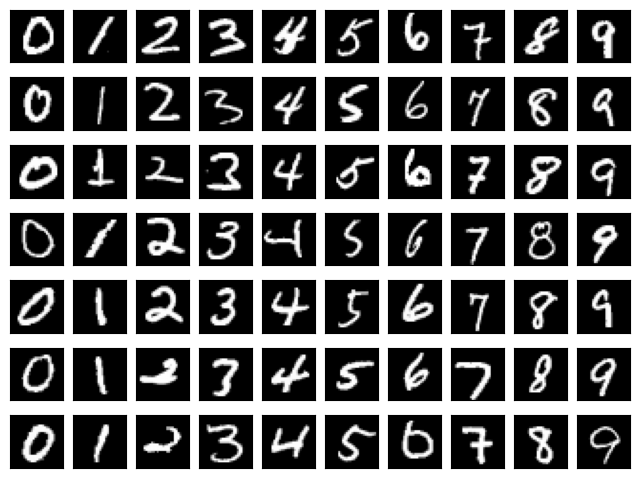

In [69]:
%matplotlib inline 
import PIL.Image
from IPython.display import Image, display
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
fig = plt.figure(figsize=(8,6))
for i in range(10):
    train_set_index = np.nonzero(y_train==i)[0]
    for j in range(7):
        ax = plt.subplot(7,10,i+j*10+1)        
        ax.imshow(np.reshape(X_train[train_set_index[j]],(28,28)),cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
plt.show()

<h3>Train KNN classifier</h3>

In [70]:
from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
classification = neighbors.KNeighborsClassifier(n_neighbors=10, weights='uniform',n_jobs=-1)
classification.fit(X = X_train, y =y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,-1


<h3>Evaluate classification against the test set</h3>

In [71]:
score = classification.score(X_test,y_test)
print('Classification score: {0:f}'.format(score))

Classification score: 0.967500


#### Show sample classification results

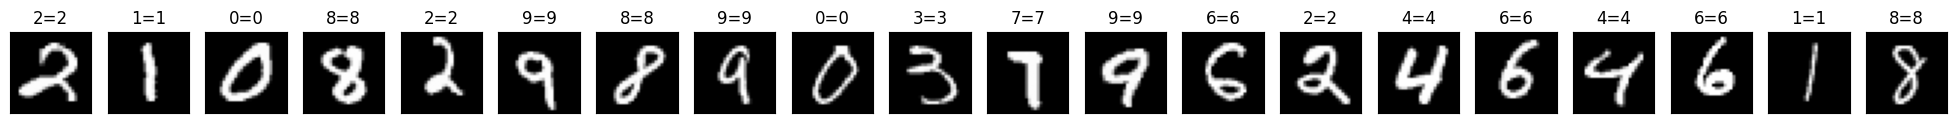

In [72]:
import PIL.Image
from IPython.display import Image, display
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import random

n_samples = 20
samples_index = random.sample(range(X_test.shape[0]),n_samples)
y = classification.predict(X_test[samples_index])
fig = plt.figure(figsize=(25,5))
for i in range(len(samples_index)):
    ax = plt.subplot(1,n_samples,i+1)
    imshow(np.reshape(X_test[samples_index[i]],(28,28)),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if y_test[samples_index[i]]==y[i]:
        plt.title('{0:d}={1:d}'.format(y_test[samples_index[i]],y[i]))
    else:
        plt.title('{0:d}!={1:d}'.format(y_test[samples_index[i]],y[i]))
plt.show()

<h1>OCR: Classification of hand-written digits</h1>

The original dataset is located at http://yann.lecun.com/exdb/mnist/<br>
The derived pickle file is located at http://deeplearning.net/tutorial/gettingstarted.html<br>
The following package can read the original data directly: https://github.com/sorki/python-mnist/blob/master/mnist/loader.py<br>

In [73]:
import zipfile
import pickle
import os
import numpy as np
if not os.path.isfile('local_data/mnist.pickle'):
    # read data from zipped CSV file
    with zipfile.ZipFile('mnist.zip') as in_zip:
        with in_zip.open('mnist.csv') as f:
            mnist_data = np.loadtxt(f, delimiter=",", dtype='uint8')
        y = mnist_data[:,0]
        X = mnist_data[:,1:]
    # save data into pickle for later use    
    with open('local_data/mnist.pickle','w+b') as out_file: 
        pickle.dump(y,out_file,-1)
        pickle.dump(X,out_file,-1)
else: 
    with open('local_data/mnist.pickle','rb') as in_file: 
        y = pickle.load(in_file)
        X = pickle.load(in_file)
X = X/255.0
number_of_images = X.shape[0]
image_shape = (int(np.sqrt(X.shape[1])),int(np.sqrt(X.shape[1])))
print('Loaded {0} digits, each {1}x{2} pixels'.format(number_of_images,image_shape[0],image_shape[1]))

Loaded 70000 digits, each 28x28 pixels


In [74]:
X[0][:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [75]:
y[0]

5

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7)
print('training set: {0:d} images'.format(X_train.shape[0]))
print('test set: {0:d} images'.format(X_test.shape[0]))
print('Image size: 28x28')

training set: 60000 images
test set: 10000 images
Image size: 28x28


<h2>Explore the dataset</h2>

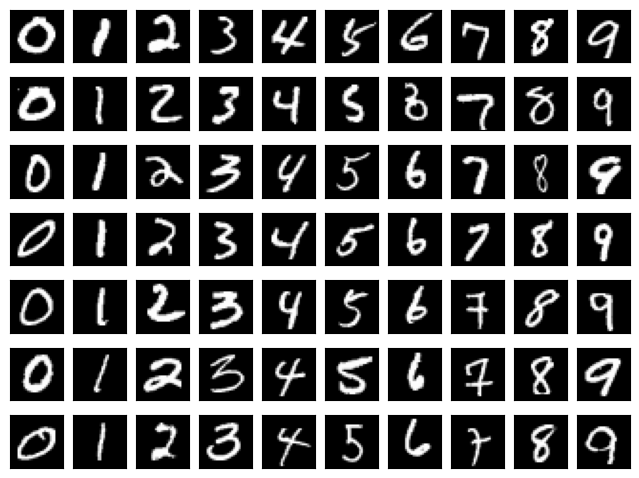

In [77]:
%matplotlib inline 
import PIL.Image
from IPython.display import Image, display
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
fig = plt.figure(figsize=(8,6))
for i in range(10):
    train_set_index = np.nonzero(y_train==i)[0]
    for j in range(7):
        ax = plt.subplot(7,10,i+j*10+1)        
        ax.imshow(np.reshape(X_train[train_set_index[j]],(28,28)),cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
plt.show()

<h3>Train KNN classifier</h3>

In [78]:
from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
classification = neighbors.KNeighborsClassifier(n_neighbors=10, weights='uniform',n_jobs=-1)
classification.fit(X = X_train, y =y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,-1


<h3>Evaluate classification against the test set</h3>

In [79]:
score = classification.score(X_test,y_test)
print('Classification score: {0:f}'.format(score))

Classification score: 0.971500


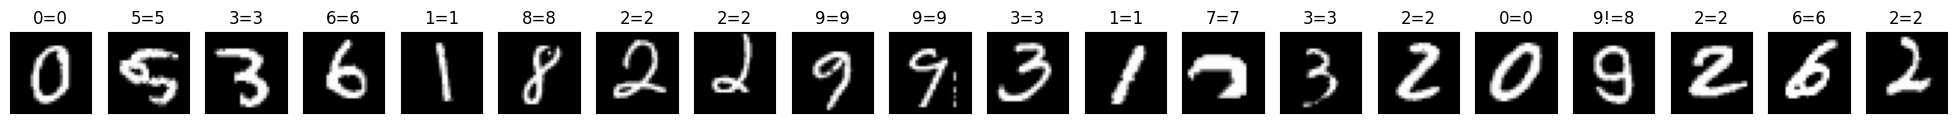

In [80]:
import PIL.Image
from IPython.display import Image, display
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import random

n_samples = 20
samples_index = random.sample(range(X_test.shape[0]),n_samples)
y = classification.predict(X_test[samples_index])
fig = plt.figure(figsize=(25,5))
for i in range(len(samples_index)):
    ax = plt.subplot(1,n_samples,i+1)
    imshow(np.reshape(X_test[samples_index[i]],(28,28)),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if y_test[samples_index[i]]==y[i]:
        plt.title('{0:d}={1:d}'.format(y_test[samples_index[i]],y[i]))
    else:
        plt.title('{0:d}!={1:d}'.format(y_test[samples_index[i]],y[i]))